In [1]:
import pandas as pd
import torch
import torchrec

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

/tmp/ipykernel_10023/3436774584.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/shizhe/miniconda3/envs/rec/lib/python3.11/site-packages/torchrec/sparse/jagged_tensor.py:588: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _register_pytree_node(JaggedTensor, _jt_flatten, _jt_unflatten)
/home/shizhe/miniconda3/envs/rec/lib/python3.11/site-packages/torchrec/sparse/jagged_tensor.py:1993: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node i

# loading data

In [2]:
info = pd.read_csv('dataset/ml-100k/u.info' , names=['Counts' , 'Type'], sep=" ", header = None)
info.to_csv('dataset/ml-100k/info.csv')
info

,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


In [3]:
occupation = pd.read_csv('dataset/ml-100k/u.occupation', names=['Occupation'], header = None)
occupation.to_csv('dataset/ml-100k/occupation.csv')
occupation

,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [4]:
items = pd.read_csv('dataset/ml-100k/u.item' , header = None , sep = "|" , encoding='latin-1')
items.columns = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
              'Thriller' , 'War' , 'Western']
items.to_csv('dataset/ml-100k/item.csv')
items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user = pd.read_csv('dataset/ml-100k/u.user', names=['user_id' , 'age' , 'gender' , 'occupation' , 'zipcode'],
                   header= None , sep = '|')
user.to_csv('dataset/ml-100k/user.csv')
user

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [6]:
genre = pd.read_csv('dataset/ml-100k/u.genre', names=['Genre' , 'genre_id'], header= None , sep = '|' )
genre.to_csv('dataset/ml-100k/genre.csv')
genre

,Genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [7]:
data = pd.read_csv('dataset/ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], header= None , sep = '\t')
data.to_csv('dataset/ml-100k/data.csv')
data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


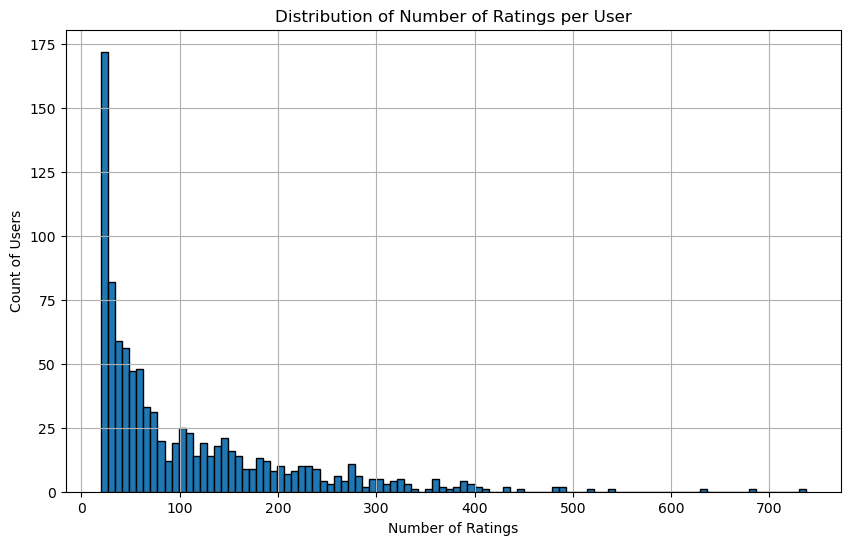

In [8]:
ratings_per_user = data.groupby('user_id').size()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
ratings_per_user.hist(bins=100, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()


In [9]:
ratings_per_user.sort_values()

user_id
202     20
441     20
685     20
34      20
36      20
      ... 
276    518
450    540
13     636
655    685
405    737
Length: 943, dtype: int64

In [10]:
mean_rating_per_user = data.groupby('user_id').mean('rating')['rating']
mean_rating_per_user

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Length: 943, dtype: float64

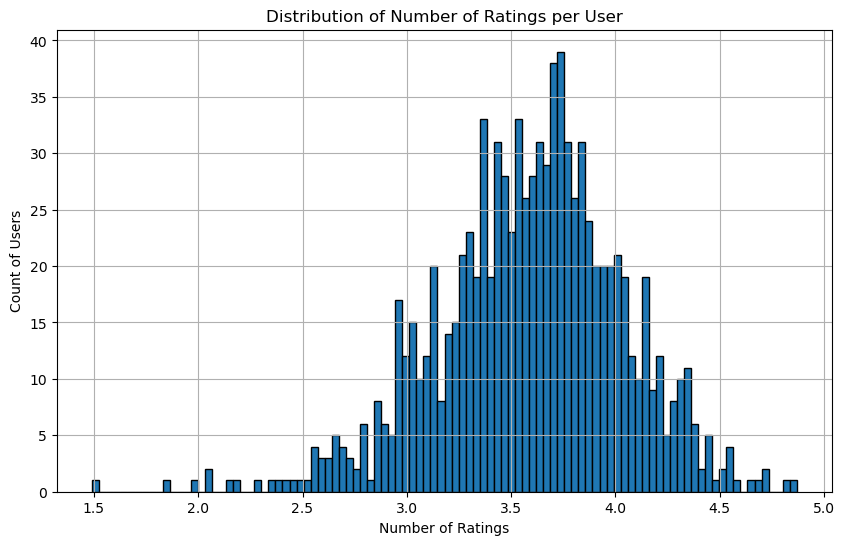

In [11]:
plt.figure(figsize=(10, 6))
mean_rating_per_user.hist(bins=100, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

In [12]:
mean_rating_per_movie = data.groupby('item_id').mean('rating')['rating']

In [13]:
mean_rating_per_movie

item_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

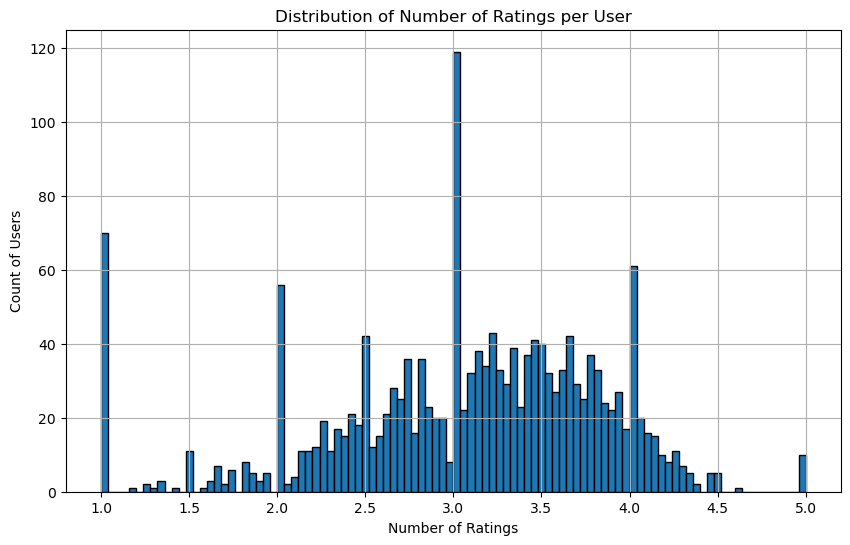

In [14]:
plt.figure(figsize=(10, 6))
mean_rating_per_movie.hist(bins=100, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

In [15]:
dict(mean_rating_per_movie)

{1: 3.8783185840707963,
 2: 3.2061068702290076,
 3: 3.033333333333333,
 4: 3.550239234449761,
 5: 3.302325581395349,
 6: 3.576923076923077,
 7: 3.798469387755102,
 8: 3.9954337899543377,
 9: 3.8963210702341136,
 10: 3.831460674157303,
 11: 3.847457627118644,
 12: 4.385767790262173,
 13: 3.4184782608695654,
 14: 3.9672131147540983,
 15: 3.7781569965870307,
 16: 3.2051282051282053,
 17: 3.119565217391304,
 18: 2.8,
 19: 3.9565217391304346,
 20: 3.4166666666666665,
 21: 2.761904761904762,
 22: 4.151515151515151,
 23: 4.1208791208791204,
 24: 3.4482758620689653,
 25: 3.4436860068259385,
 26: 3.452054794520548,
 27: 3.1052631578947367,
 28: 3.931159420289855,
 29: 2.6666666666666665,
 30: 3.945945945945946,
 31: 3.6298701298701297,
 32: 3.7901234567901234,
 33: 3.4536082474226806,
 34: 2.7142857142857144,
 35: 2.1818181818181817,
 36: 2.1538461538461537,
 37: 2.25,
 38: 3.0083333333333333,
 39: 3.264367816091954,
 40: 2.8947368421052633,
 41: 3.081081081081081,
 42: 3.804054054054054,
 43: 

In [16]:
import random
data.iloc[random.sample(range(len(data)), 5),:]

,user_id,item_id,rating,timestamp
34914,13,193,5,882139937
16706,206,891,2,888180049
32712,345,464,3,884992084
67866,600,232,3,888451839
52576,296,256,5,884196741


In [17]:
random.sample(list(data.index), 5)

[22168, 52899, 64680, 43641, 10970]

In [18]:
list(data.item_id)

[242,
 302,
 377,
 51,
 346,
 474,
 265,
 465,
 451,
 86,
 257,
 1014,
 222,
 40,
 29,
 785,
 387,
 274,
 1042,
 1184,
 392,
 486,
 144,
 118,
 1,
 546,
 95,
 768,
 277,
 234,
 246,
 98,
 193,
 88,
 194,
 274,
 1081,
 603,
 796,
 32,
 16,
 304,
 979,
 564,
 327,
 201,
 1137,
 241,
 4,
 332,
 100,
 432,
 322,
 181,
 196,
 679,
 384,
 143,
 423,
 515,
 20,
 288,
 219,
 526,
 919,
 26,
 232,
 427,
 304,
 274,
 512,
 15,
 1049,
 416,
 165,
 690,
 248,
 1444,
 5,
 229,
 237,
 229,
 480,
 54,
 144,
 366,
 518,
 403,
 111,
 625,
 338,
 25,
 1016,
 154,
 275,
 1153,
 498,
 382,
 209,
 23,
 294,
 382,
 208,
 685,
 144,
 328,
 496,
 132,
 174,
 118,
 498,
 96,
 151,
 307,
 144,
 648,
 346,
 21,
 832,
 514,
 789,
 485,
 317,
 195,
 200,
 385,
 195,
 750,
 264,
 265,
 245,
 135,
 1147,
 471,
 658,
 140,
 23,
 379,
 815,
 479,
 368,
 274,
 1211,
 1134,
 836,
 272,
 756,
 427,
 787,
 14,
 955,
 419,
 405,
 504,
 111,
 466,
 135,
 268,
 486,
 117,
 427,
 919,
 273,
 514,
 98,
 559,
 794,
 323,
 117,


In [19]:
data['rating']

0        3
1        3
2        1
3        2
4        1
        ..
99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, Length: 100000, dtype: int64

In [20]:
data['rating'][-5:]

99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, dtype: int64

In [26]:
data.groupby('user_id').agg(set)['item_id']

user_id
1      {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2      {257, 258, 1, 10, 13, 14, 269, 272, 273, 274, ...
3      {258, 260, 264, 268, 271, 272, 288, 294, 299, ...
4      {258, 260, 264, 11, 271, 288, 294, 300, 301, 3...
5      {1, 2, 17, 21, 24, 25, 29, 40, 42, 50, 62, 63,...
                             ...                        
939    {257, 258, 255, 1028, 9, 266, 15, 274, 275, 40...
940    {4, 516, 7, 8, 9, 521, 12, 14, 527, 529, 549, ...
941    {257, 258, 1, 7, 15, 273, 147, 919, 408, 294, ...
942    {514, 1028, 520, 528, 1050, 539, 31, 50, 71, 5...
943    {2, 1028, 9, 11, 12, 526, 1044, 22, 23, 24, 10...
Name: item_id, Length: 943, dtype: object